In [1]:
# import dependncies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
# load data
df = pd.read_csv("data/travel_insurance.csv")

In [27]:
# show details of how data set is constructed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [28]:
# preview data
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [9]:
# check values in GraduateOrNot, FrequentFlyer, and EverTravlledAbroad
df[["GraduateOrNot","FrequentFlyer","EverTravelledAbroad"]].value_counts()

GraduateOrNot  FrequentFlyer  EverTravelledAbroad
Yes            No             No                     1154
No             No             No                      204
Yes            Yes            No                      197
               No             Yes                     191
               Yes            Yes                     150
No             Yes            No                       52
               No             Yes                      21
               Yes            Yes                      18
dtype: int64

In [10]:
# convert Yes and No into numeric
df.replace(to_replace=["Yes", "No"],
          value=[1,0],
          inplace=True)

In [22]:
#remove scientific notation of data
pd.options.display.float_format = '{:20,.2f}'.format

In [11]:
# verify column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   int64 
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   int64 
 7   EverTravelledAbroad  1987 non-null   int64 
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 139.8+ KB


In [12]:
# preview transfored data
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [14]:
# verify that ChronicDiseases, FrequentFlyer, and TravelInsurance columns are populated with 0 and 1
df[["ChronicDiseases","FrequentFlyer","TravelInsurance"]].value_counts()

ChronicDiseases  FrequentFlyer  TravelInsurance
0                0              0                  792
                                1                  326
1                0              0                  307
0                1              1                  179
1                0              1                  145
0                1              0                  138
1                1              1                   60
                                0                   40
dtype: int64

In [15]:
# split data between customers and non-customrs
customers = df[df.TravelInsurance==1]
non_cust = df[df.TravelInsurance==0]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [16]:
#preview customer data
customers.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
7,31,Private Sector/Self Employed,1,1350000,3,0,1,1,1
8,28,Private Sector/Self Employed,1,1450000,6,1,1,1,1
11,26,Private Sector/Self Employed,1,1400000,5,0,1,1,1
12,32,Government Sector,1,850000,6,0,0,0,1


In [18]:
#preview non-customer data
non_cust.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0
5,25,Private Sector/Self Employed,0,1150000,4,0,0,0,0


In [24]:
# get summary stats of non-customers
non_cust.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,"1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00","1,277.00"
mean,29.52,0.85,"821,299.92",4.66,0.27,0.14,0.06,0.00
std,2.64,0.36,"328,898.90",1.56,0.45,0.35,0.25,0.00
min,25.00,0.00,"300,000.00",2.00,0.00,0.00,0.00,0.00
25%,28.00,1.00,"550,000.00",4.00,0.00,0.00,0.00,0.00
50%,29.00,1.00,"800,000.00",4.00,0.00,0.00,0.00,0.00
75%,31.00,1.00,"1,100,000.00",6.00,1.00,0.00,0.00,0.00
max,35.00,1.00,"1,750,000.00",9.00,1.00,1.00,1.00,0.00


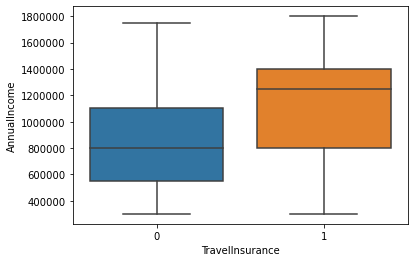

In [30]:
# create box plots of income, showing customers and non-customers separately
sns.boxplot(x="TravelInsurance",y="AnnualIncome", data=df)

# remove scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.show()